Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10 [00:00<?, ?it/s]

Text(0.5, 0, 'K')

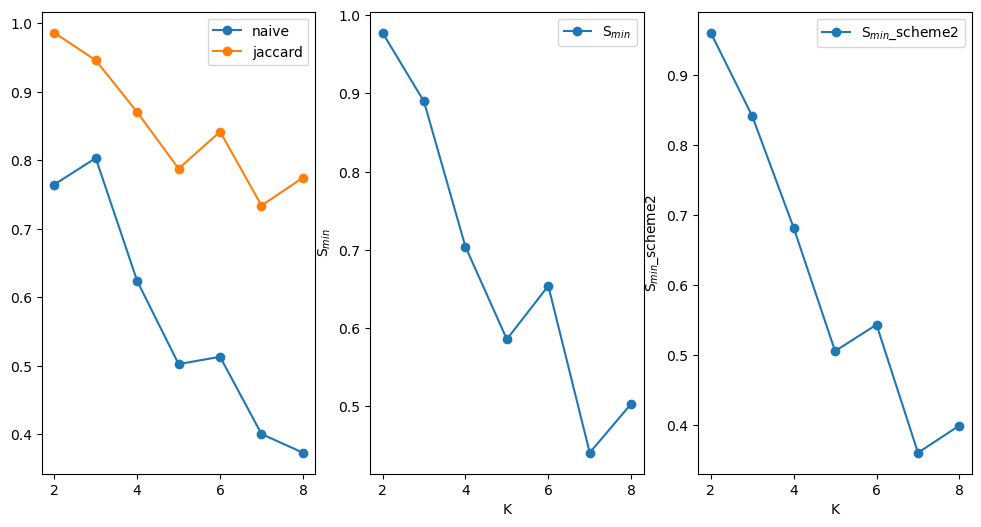

In [4]:
from sklearn.datasets import load_iris
from modules.stability_scheme1 import stability
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
data = iris.data[:, 1:3]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# print stability examples
K = 3
B = 10

# _stability = stability(org_data=X_pca, K=K, B=B)

# print(_stability.naive_stabs[1])
# print(_stability.naive_stabs[2])
# print()

# print(_stability.jaccard_stabs[1])
# print(_stability.jaccard_stabs[2])

# cluster-wise stability 
naive_stab = []
jaccard_stab = []
Smins = []
Smins_scheme2 = []
for k in range(2, 9):
    _stability = stability(org_data=X_pca, K=k, B=B, B2O_mapping_method='euclidean')
    naive_stab.append(_stability.naive_stabs[2])
    jaccard_stab.append(_stability.jaccard_stabs[2])
    Smins.append(_stability.Smin_scheme1)
    Smins_scheme2.append(_stability.Smin_scheme2)
    
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131)
plt.plot(range(2, 9), naive_stab, marker='o');
plt.plot(range(2, 9), jaccard_stab, marker='o');
plt.legend(("naive", "jaccard"))

ax = fig.add_subplot(132)
plt.plot(range(2,9), Smins, marker='o', label="S$_{min}$");
plt.legend()
plt.ylabel("S$_{min}$")
plt.xlabel("K")

ax = fig.add_subplot(133)
plt.plot(range(2,9), Smins_scheme2, marker='o', label="S$_{min}$_scheme2");
plt.legend()
plt.ylabel("S$_{min}$_scheme2")
plt.xlabel("K")

Bootstrapping...:   0%|          | 0/100 [00:00<?, ?it/s]

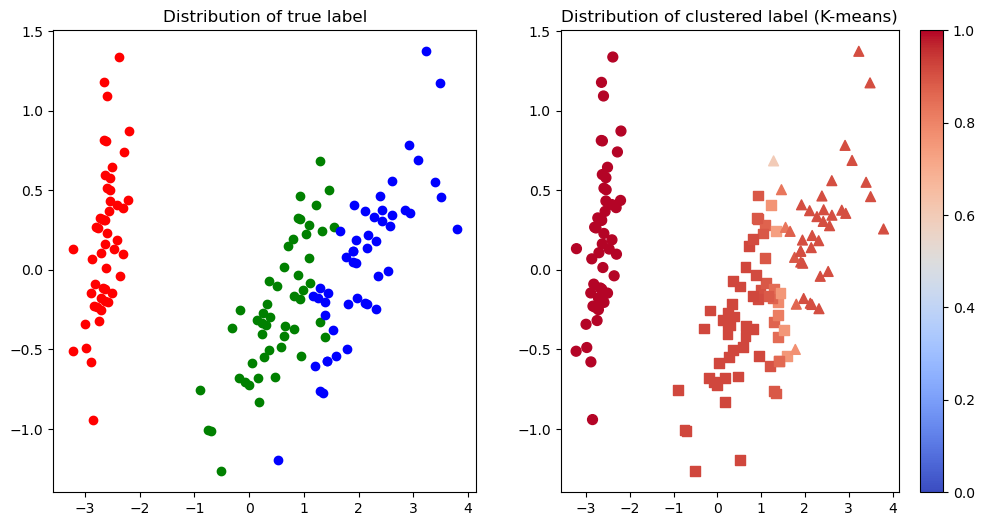

In [3]:
# Original distribution
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
idx = np.arange(data.shape[0])

idx0 = idx[iris.target == 0]
idx1 = idx[iris.target == 1]
idx2 = idx[iris.target == 2]
plt.scatter(X_pca[idx0, 0], X_pca[idx0, 1], color='r')
plt.scatter(X_pca[idx1, 0], X_pca[idx1, 1], color='g')
plt.scatter(X_pca[idx2, 0], X_pca[idx2, 1], color='b')
plt.title("Distribution of true label")

# Distribution from clustering stability with K-means
ax = fig.add_subplot(122)
idx = np.arange(data.shape[0])

_stability = stability(org_data=X_pca, K=3, B=100)
color_for_stab = _stability.jaccard_stabs[0]
cmap = plt.cm.get_cmap('coolwarm')

idx0 = idx[_stability._orgClustering.labels == 0]
idx1 = idx[_stability._orgClustering.labels == 1]
idx2 = idx[_stability._orgClustering.labels == 2]

scatter0 = ax.scatter(X_pca[idx0, 0], X_pca[idx0, 1], marker='s', s=50, c=color_for_stab[idx0], cmap=cmap, vmin=0, vmax=1)
scatter1 = ax.scatter(X_pca[idx1, 0], X_pca[idx1, 1], marker='o', s=50, c=color_for_stab[idx1], cmap=cmap, vmin=0, vmax=1)
scatter2 = ax.scatter(X_pca[idx2, 0], X_pca[idx2, 1], marker='^', s=50, c=color_for_stab[idx2], cmap=cmap, vmin=0, vmax=1)
plt.title("Distribution of clustered label (K-means)")

cbar = plt.colorbar(scatter0)

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(122)
idx = np.arange(data.shape[0])

_stability = stability(org_data=X_pca, K=3, B=100)
color_for_stab = _stability.jaccard_stabs[0]
cmap = plt.cm.get_cmap('coolwarm')

markers = ['s', 'o', '^']
for k in range(K):
    temp_idx = idx[_stability._orgClustering.labels == k]
    temp_scatter = ax.scatter(X_pca[temp_idx, 0], X_pca[temp_idx, 1], marker=markers[k], s=50, c=color_for_stab[temp_idx], cmap=cmap, vmin=0, vmax=1)

plt.title("Distribution of clustered label (K-means)")

cbar = plt.colorbar(scatter0)